In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Model Creation 
import tensorflow as tf 

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import Model 
from tensorflow.keras import optimizers as OPT
from tensorflow.keras import losses
from tensorflow.keras.utils import Sequence 

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HackCBS/bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.drop("Density", axis  = 1, inplace = True)
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


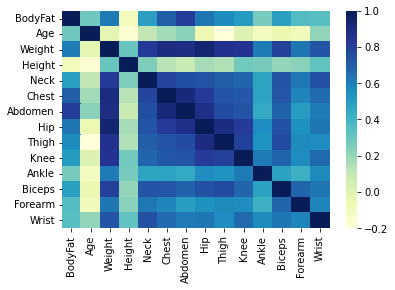

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

In [ ]:
df.drop("Height", inplace = True, axis = 1)

In [ ]:
y = df["BodyFat"]
df.drop("BodyFat", axis = 1, inplace = True)
train_x, test_x, train_y, test_y = train_test_split(df, y, test_size = 0.2, random_state = 10)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, random_state = 10)
print(train_x.shape, val_x.shape, test_x.shape)

(180, 12) (21, 12) (51, 12)


In [ ]:
model = Sequential([
    layers.Dense(256, input_shape=(12,), kernel_initializer = 'normal', activation ='relu'),
    layers.Dense(128, kernel_initializer ='normal', activation = 'relu'),
    layers.Dense(64, kernel_initializer ='normal', activation = 'relu'),
    layers.Dense(32, kernel_initializer ='normal', activation = 'relu'),
    layers.Dense(16, kernel_initializer ='normal', activation = 'relu'),
    layers.Dense(16, kernel_initializer ='normal', activation = 'relu'),
    layers.Dense(8, kernel_initializer ='normal', activation = 'relu'),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(df, y, epochs = 100, batch_size = 4)

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 22.6627
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 25.0306
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 24.9519
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 34.0907
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 22.2348
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 26.5098
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 22.7677
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 24.7751
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 23.3471
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 22.5059
Epoch 11/100
63/63 [==============================] - 0s 2ms/step - loss: 26.5213
Epoch 12/100
63/63 [==============================] - 0s 2ms/step - loss: 22.5765
Epoch 13/100
63/63 [=====

In [ ]:
model.save("bodyfat.h5")
from google.colab import files
files.download("bodyfat.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>